In [1]:
import os
path = os.getcwd()

if path[1:5] == 'Home':
    %run /Home/siv30/wad005/useful_py_functions/matplotlib_custom_style_and_macros.py
    %run /Home/siv30/wad005/master/GRB/src/harvest_matlab_data.ipynb
    #%run /Home/siv30/wad005/master/GRB/src/dau_det_distribution.ipynb
    %run /Home/siv30/wad005/master/GRB/src/ASIMXspec.ipynb

    path_andrey = '/Home/siv30/wad005/master/GRB/MATLAB/andrey_mezentsev/'

else:
    %run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
    #%run /Users/andreas/phys/master/GRB/src/dau_det_distribution.ipynb
    %run /Users/andreas/phys/master/GRB/src/ASIMXspec.ipynb
    path_andrey = '/Users/andreas/phys/master/GRB/MATLAB/andrey_mezentsev/'
    
from stingray import Lightcurve as LC
from stingray import CrossCorrelation as CC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Estimating T90 
    -importing the ASIM data (using Andrey data)
    -binning by 2 ms (or what is appropriate)
    -estimating background --> subtracting background from LC
    -Apply np.cumsum() on binned data and find % of observed counts

#### GRB 190606A
    -Seems like a good starting point; very short and bright!
    
    T90 estimation from different binsizes:
        - 1ms = 0.153999
        - 2ms = 0.154
        - 4ms = 0.152
        - 8ms = 0.152
        -16ms = 0.156

2019-06-06 01:55:06.781982


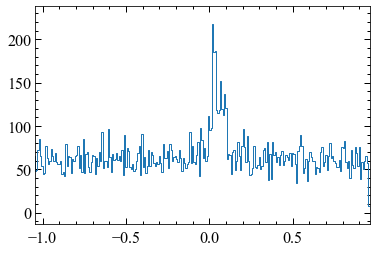

In [56]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

binsize = 0.008
tlagg_asim = -0.5366225269343781

# Load data
asimData = pd.read_csv('/Home/siv30/wad005/master/GRB/MATLAB/andrey_mezentsev/GRB190606A.csv')
asimData['tus'] /= 1e6
asimData['tus'] += tlagg_asim
tus_asim = asimData['tus'].to_numpy()

# Calculate T0
T0 = datetime.fromisoformat('2019-06-06T01:55:07.318605') + timedelta(seconds=tlagg_asim)
print(T0)

# Create histogram
grb_190606A_hist = np.histogram(tus_asim, np.arange(tus_asim[0], tus_asim[-1] + binsize, binsize))
grb_190606A_counts, grb_190606A_edges = grb_190606A_hist[0], grb_190606A_hist[1]

plt.step(grb_190606A_edges[:-1],grb_190606A_counts)
plt.show()

T90 = 0.15200000000000014 s


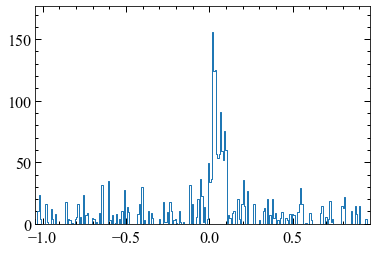

In [57]:

# Estimate background
ti_bkg, tf_bkg = -1.0, -0.2
background_range = (grb_190606A_edges[:-1] >= ti_bkg) & (grb_190606A_edges[:-1] < tf_bkg)
background_level = np.mean(grb_190606A_counts[background_range])

# Subtract background
background_subtracted = grb_190606A_counts - background_level

# Calculate cumulative sum
cumulative_counts = np.cumsum(background_subtracted)

# Calculate T90
total_counts = np.mean(cumulative_counts[-50:])
t1 = grb_190606A_edges[np.searchsorted(cumulative_counts, 0.05 * total_counts)]
t2 = grb_190606A_edges[np.searchsorted(cumulative_counts, 0.95 * total_counts)]
T90 = t2 - t1

print(f"T90 = {T90} s")

# Plot
plt.step(grb_190606A_edges[:-1], background_subtracted)
plt.ylim(bottom=0)
plt.show()

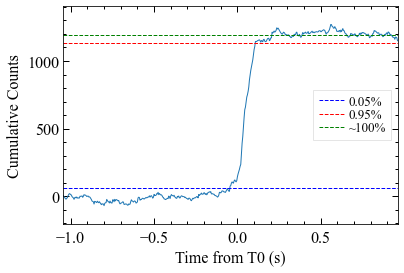

In [55]:
# Plot cumulative counts
plt.plot(grb_190606A_edges[:-1], cumulative_counts)
plt.xlabel('Time from T0 (s)')
plt.ylabel('Cumulative Counts')

# Add horizontal lines at 5% and 95% of total counts
plt.axhline(y=0.05 * total_counts, color='b', linestyle='--',label='0.05%')
plt.axhline(y=0.95 * total_counts, color='r', linestyle='--',label='0.95%')

# Add horizontal line at the average of the last 50 elements
plt.axhline(y=total_counts, color='g', linestyle='--',label='~100%')

plt.legend()
plt.show()